In [2]:
import pandas as pd
DataDir = r'C:\Users\Patron\Documents\GitHub\ManagerialEconomics\AAE625GitHub\MgrlEconAnaPub\ElasticityPricingStrategyAnalysis'
NewDir = DataDir
df_retail = pd.read_csv(NewDir + '\\shopping_behavior_updated.csv')
df_retail.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
df_retail.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [8]:
#Generate column names
df_retail.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [9]:
#Generate count of unique values
df_retail.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [10]:
#Generate location purchase statistics 
location_purchase_info = df_retail.groupby("Location")["Purchase Amount (USD)"].agg(["mean", "median", "sum"])
location_purchase_info.head(10)

,mean,median,sum
Location,,,
Alabama,59.112360,56.0,5261
Alaska,67.597222,68.5,4867
Arizona,66.553846,68.0,4326
Arkansas,61.113924,58.0,4828
California,59.000000,57.0,5605
Colorado,56.293333,51.0,4222
Connecticut,54.179487,48.5,4226
Delaware,55.325581,52.5,4758
Florida,55.852941,56.0,3798


In [11]:
#Create regional groups to analyze regional trends 
location_groups = df_retail.groupby("Location")
location_groups.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,60,Male,Shorts,Clothing,82,Washington,S,Turquoise,Spring,3.6,Yes,Standard,Yes,Yes,7,Bank Transfer,Every 3 Months
450,451,25,Male,Boots,Footwear,21,Connecticut,L,Beige,Summer,2.7,Yes,Store Pickup,Yes,Yes,19,Credit Card,Monthly
492,493,50,Male,Shirt,Clothing,62,Michigan,M,Black,Fall,3.9,Yes,Standard,Yes,Yes,11,Debit Card,Weekly
495,496,33,Male,Handbag,Accessories,36,Michigan,XL,Cyan,Fall,3.3,Yes,Free Shipping,Yes,Yes,6,Debit Card,Fortnightly


In [12]:
#Analyze average price by region 
avg_price = location_groups["Purchase Amount (USD)"].mean()
avg_price.sort_values(ascending = False)

Location
Alaska            67.597222
Pennsylvania      66.567568
Arizona           66.553846
West Virginia     63.876543
Nevada            63.379310
Washington        63.328767
North Dakota      62.891566
Virginia          62.883117
Utah              62.577465
Michigan          62.095890
Tennessee         61.974026
New Mexico        61.901235
Rhode Island      61.444444
Texas             61.194805
Arkansas          61.113924
Illinois          61.054348
Mississippi       61.037500
Massachusetts     60.888889
Iowa              60.884058
North Carolina    60.794872
Wyoming           60.690141
South Dakota      60.514286
New York          60.425287
Ohio              60.376623
Montana           60.250000
Idaho             60.075269
Nebraska          59.448276
New Hampshire     59.422535
Alabama           59.112360
California        59.000000
Indiana           58.924051
Georgia           58.797468
South Carolina    58.407895
Oklahoma          58.346667
Missouri          57.913580
Hawaii     

<Axes: title={'center': 'Impact of Promo Code Used on Purchase'}, ylabel='count'>

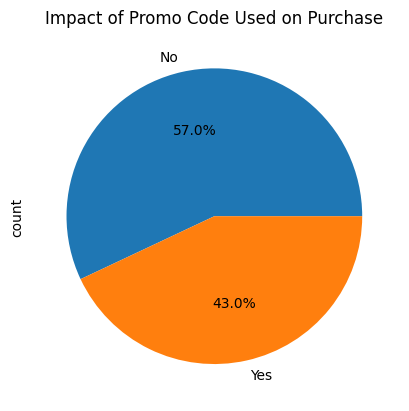

In [14]:
promocode_used = df_retail["Promo Code Used"].value_counts()
promocode_used.plot(kind = "pie", autopct = '%.1f%%', title = "Impact of Promo Code Used on Purchase")  

In [15]:
#Determine items most frequently purchased
total_items = df_retail.groupby('Item Purchased')['Purchase Amount (USD)'].count()
total_items_sorted = total_items.sort_values(ascending=False)
total_items_sorted

Item Purchased
Jewelry       171
Blouse        171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Purchase Amount (USD), dtype: int64

In [20]:
#Based on the frequencies above, a good strategy may be to create a bundle 'least_purchased_bundle' with a discount to encourage consumers to purchase
def least_purchased_bundle(item1_price, item2_price, discount_percent):
    prices = {'Jeans': item1_price, 'Gloves': item2_price}
    total_price = sum(prices.values())
    discounted_price = total_price * (1 - discount_percent / 100)

    print(f"Selected Items and Prices: {prices}")
    print(f"Total Price before Discount: ${total_price:.2f}")
    print(f"Discounted Price (50% off): ${discounted_price:.2f}")

least_purchased_bundle(3650, 800, 50)

Selected Items and Prices: {'Jeans': 3650, 'Gloves': 800}
Total Price before Discount: $4450.00
Discounted Price (50% off): $2225.00


In [27]:
#To investigate elasticities, we will first need to take the natural log of each variable:
import numpy as np
df_retail['LN_PRICE'] = np.log(df_retail['Purchase Amount (USD)'])
df_retail['LN_REVENUE'] = np.log(df_retail['Purchase Amount (USD)'])
